In [ ]:
# I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Part I: Building a Basic NN

In [ ]:
incomedf = pd.read_csv('income_dataset.csv')
incomedf

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


In [ ]:
incomedf.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256000e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897801e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055511e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178242e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
incomedf.dtypes

age                 int64
workclass          object
fnlwgt            float64
education          object
education.num       int64
marital.status     object
occupation         object
relationship       object
capital.gain        int64
capital.loss        int64
hours.per.week      int64
native.country     object
income             object
dtype: object

In [ ]:
incomedf

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


In [ ]:
incomedf.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            1
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
incomedf = incomedf.drop(incomedf[incomedf.workclass.str.contains(r'[?]')].index)
incomedf

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


In [ ]:
incomedf = incomedf.drop(incomedf[incomedf.occupation.str.contains(r'[?]')].index)
incomedf

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


In [ ]:
incomedf = incomedf.drop(incomedf[incomedf['native.country'].str.contains(r'[?]')].index)
incomedf

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
5,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K
6,38,Private,150601.0,10th,6,Separated,Adm-clerical,Unmarried,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152.0,Some-college,10,Never-married,Protective-serv,Not-in-family,0,0,40,United-States,<=50K
32557,27,Private,257302.0,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,38,United-States,<=50K
32558,40,Private,154374.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,40,United-States,>50K
32559,58,Private,151910.0,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,40,United-States,<=50K


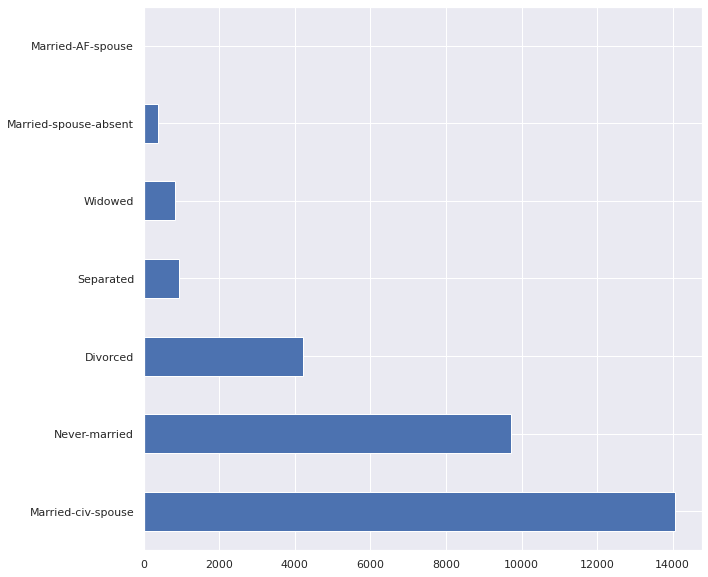

In [ ]:
incomedf['marital.status'].value_counts().plot(kind='barh')

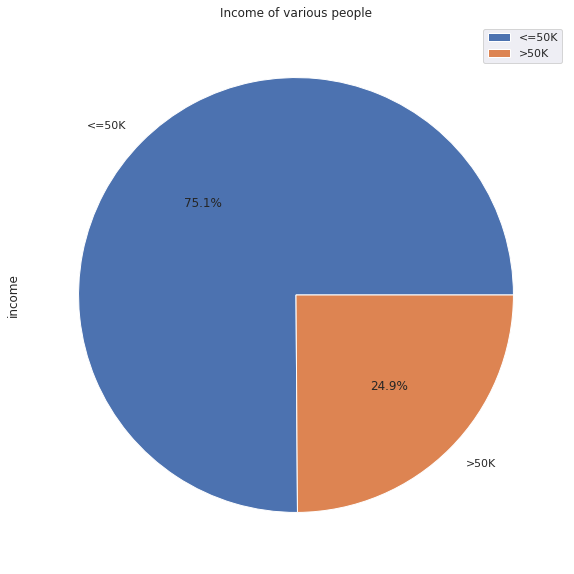

In [ ]:
plt.figure(figsize=(10,10))
incomedf['income'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Income of various people")
plt.legend()

In [ ]:
incomedf.isnull().sum(axis=0)

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
normalizeddf = incomedf.copy()
normalizeddf[['workclass','education','marital.status','occupation','relationship','native.country','income']] = normalizeddf[['workclass','education','marital.status','occupation','relationship','native.country','income']].astype('category')
normalizeddf['fnlwgt'] = normalizeddf['fnlwgt'].astype('int64')
normalizeddf.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object

In [ ]:
column = ['age','fnlwgt','capital.gain','education.num','capital.loss','hours.per.week']
normalizeddf[column] = (normalizeddf[column] - normalizeddf[column].min()) / (normalizeddf[column].max() - normalizeddf[column].min())  
normalizeddf  

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
1,0.890411,Private,0.117131,HS-grad,0.533333,Widowed,Exec-managerial,Not-in-family,0.0,1.000000,0.173469,United-States,<=50K
3,0.506849,Private,0.086061,7th-8th,0.200000,Divorced,Machine-op-inspct,Unmarried,0.0,0.895317,0.397959,United-States,<=50K
4,0.328767,Private,0.170568,Some-college,0.600000,Separated,Prof-specialty,Own-child,0.0,0.895317,0.397959,United-States,<=50K
5,0.232877,Private,0.138072,HS-grad,0.533333,Divorced,Other-service,Unmarried,0.0,0.865473,0.448980,United-States,<=50K
6,0.287671,Private,0.093024,10th,0.333333,Separated,Adm-clerical,Unmarried,0.0,0.865473,0.397959,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,Private,0.201493,Some-college,0.600000,Never-married,Protective-serv,Not-in-family,0.0,0.000000,0.397959,United-States,<=50K
32557,0.136986,Private,0.165563,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,0.0,0.000000,0.377551,United-States,<=50K
32558,0.315068,Private,0.095589,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,0.0,0.000000,0.397959,United-States,>50K
32559,0.561644,Private,0.093914,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,0.0,0.000000,0.397959,United-States,<=50K


In [ ]:
X = normalizeddf[['age','fnlwgt','capital.gain','workclass', 'education','education.num',
       'marital.status', 'occupation',
       'relationship', 'capital.loss', 'hours.per.week',
       'native.country', 'income']]
X['workclass'] = X['workclass'].cat.codes
X['education'] = X['education'].cat.codes
X['marital.status'] = X['marital.status'].cat.codes
X['occupation'] = X['occupation'].cat.codes
X['relationship'] = X['relationship'].cat.codes
X['native.country'] = X['native.country'].cat.codes
X['income'] = X['income'].cat.codes
X.head()

,age,fnlwgt,capital.gain,workclass,education,education.num,marital.status,occupation,relationship,capital.loss,hours.per.week,native.country,income
1,0.890411,0.117131,0.0,2,11,0.533333,6,3,1,1.000000,0.173469,38,0
3,0.506849,0.086061,0.0,2,5,0.200000,0,6,4,0.895317,0.397959,38,0
4,0.328767,0.170568,0.0,2,15,0.600000,5,9,3,0.895317,0.397959,38,0
5,0.232877,0.138072,0.0,2,11,0.533333,0,7,4,0.865473,0.448980,38,0
6,0.287671,0.093024,0.0,2,0,0.333333,5,0,4,0.865473,0.397959,38,0


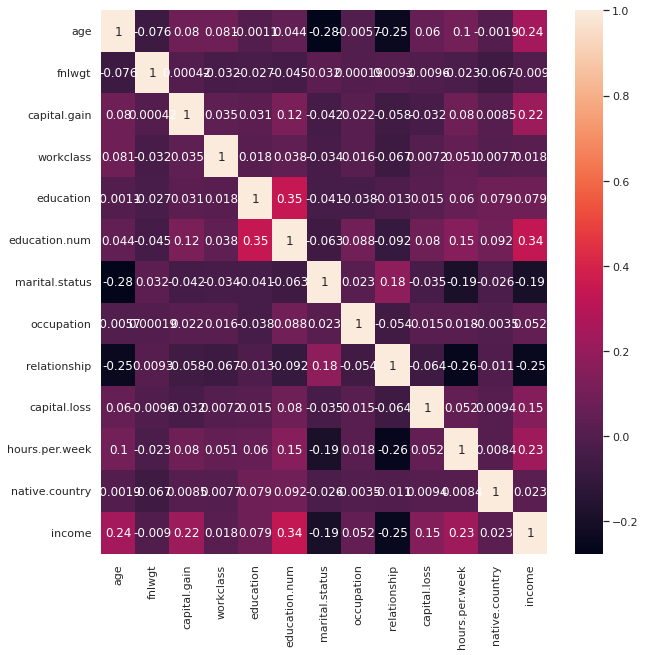

In [ ]:
import seaborn as sns
correlation = X.corr()
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(correlation,annot = True)

In [ ]:
X.shape
mean = X.mean()
var = X.var()
print(mean)
print(var)

age                0.293670
fnlwgt             0.119670
capital.gain       0.010920
workclass          2.199324
education         10.333764
education.num      0.608087
marital.status     2.580134
occupation         5.959850
relationship       1.418341
capital.loss       0.020288
hours.per.week     0.407462
native.country    36.382567
income             0.248922
dtype: float64
age                0.032374
fnlwgt             0.005159
capital.gain       0.005486
workclass          0.909972
education         14.533570
education.num      0.028900
marital.status     2.244051
occupation        16.237405
relationship       2.564284
capital.loss       0.008614
hours.per.week     0.014944
native.country    37.275573
income             0.186966
dtype: float64


In [ ]:
np.random.seed(69)

ind = np.random.rand(len(X)) < 0.8
train = X[ind]
test = X[~ind]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train)
print(scaled_train)
scaled_test = scaler.fit_transform(test)
print(scaled_test)

[[0.89041096 0.11713086 0.         ... 0.17346939 0.95       0.        ]
 [0.32876712 0.17056758 0.         ... 0.39795918 0.95       0.        ]
 [0.23287671 0.13807195 0.         ... 0.44897959 0.95       0.        ]
 ...
 [0.31506849 0.0955888  0.         ... 0.39795918 0.95       1.        ]
 [0.56164384 0.09391367 0.         ... 0.39795918 0.95       0.        ]
 [0.06849315 0.1276201  0.         ... 0.19387755 0.95       0.        ]]
[[0.50684932 0.08994317 0.         ... 0.39795918 0.95       0.        ]
 [0.49315068 0.0968412  0.         ... 0.47959184 0.95       1.        ]
 [0.31506849 0.23486049 0.         ... 0.44897959 0.95       1.        ]
 ...
 [0.2739726  0.1187336  0.         ... 0.3877551  0.95       0.        ]
 [0.19178082 0.13396703 0.         ... 0.29591837 0.95       0.        ]
 [0.1369863  0.1767666  0.         ... 0.37755102 0.95       0.        ]]


In [ ]:
from sklearn.model_selection import train_test_split
X = scaled_train[:,[0,2,5,6,7,8,9,10]]
Y = scaled_train[:,12]
np.random.seed(123)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape,Y_test.shape)

(16149, 8) (7954, 8) (16149,) (7954,)


In [ ]:
Y_train

array([0., 1., 0., ..., 0., 0., 0.])

Building the NN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(128,input_dim=8,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='relu'))

In [ ]:
model.compile(optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100
253/253 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.7330 - val_loss: 0.6924 - val_accuracy: 0.7770
Epoch 2/100
253/253 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.7514 - val_loss: 0.6919 - val_accuracy: 0.7190
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.6917 - accuracy: 0.7506 - val_loss: 0.6915 - val_accuracy: 0.7411
Epoch 4/100
253/253 [==============================] - 1s 2ms/step - loss: 0.6389 - accuracy: 0.7538 - val_loss: 0.5752 - val_accuracy: 0.7492
Epoch 5/100
253/253 [==============================] - 1s 2ms/step - loss: 0.5468 - accuracy: 0.7508 - val_loss: 0.5289 - val_accuracy: 0.7492
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5121 - accuracy: 0.7508 - val_loss: 0.5001 - val_accuracy: 0.7492
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4844 - accuracy: 0.7553 - val_loss: 0.4749 - val_accuracy: 0.7635

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 2s 3ms/step - loss: 0.3354 - accuracy: 0.8387
The accuracy of the Training data set is  83.86896848678589
249/249 [==============================] - 1s 2ms/step - loss: 0.3527 - accuracy: 0.8284
The accuracy of the Test data set is  82.83882141113281


In [ ]:
  model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 128)               1152      
                                                                 
 dense_77 (Dense)            (None, 64)                8256      
                                                                 
 dense_78 (Dense)            (None, 64)                4160      
                                                                 
 dense_79 (Dense)            (None, 2)                 130       
                                                                 
Total params: 13,698
Trainable params: 13,698
Non-trainable params: 0
_________________________________________________________________


NN Architecture Structure

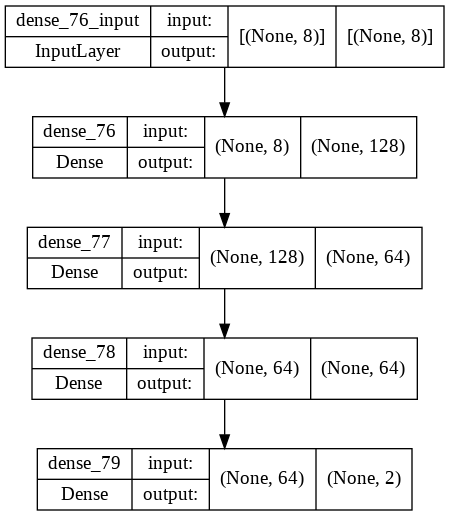

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

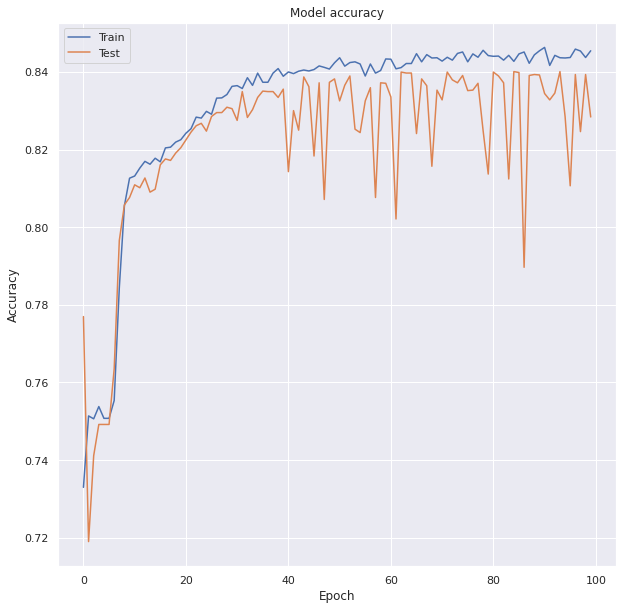

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

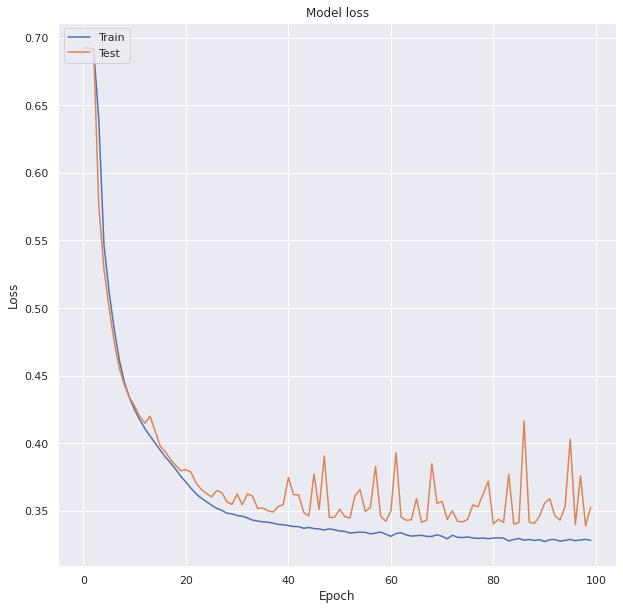

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

**Part II: Optimizing NN **

Dropout of 10% in each layer with weight costraint

In [ ]:
from keras.layers import Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


253/253 [==============================] - 2s 3ms/step - loss: 0.5696 - accuracy: 0.7359 - val_loss: 0.5340 - val_accuracy: 0.7492
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5247 - accuracy: 0.7508 - val_loss: 0.5064 - val_accuracy: 0.7492
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5002 - accuracy: 0.7513 - val_loss: 0.4817 - val_accuracy: 0.7492
Epoch 4/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4792 - accuracy: 0.7608 - val_loss: 0.4637 - val_accuracy: 0.7722
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4644 - accuracy: 0.7766 - val_loss: 0.4503 - val_accuracy: 0.7905
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4523 - accuracy: 0.7892 - val_loss: 0.4393 - val_accuracy: 0.7971
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7965 - val_loss: 0.4287 - val_accuracy: 0.8061
Epoch 8/100

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3237 - accuracy: 0.8457
The accuracy of the Training data set is  84.56870317459106
249/249 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.8378
The accuracy of the Test data set is  83.78174304962158


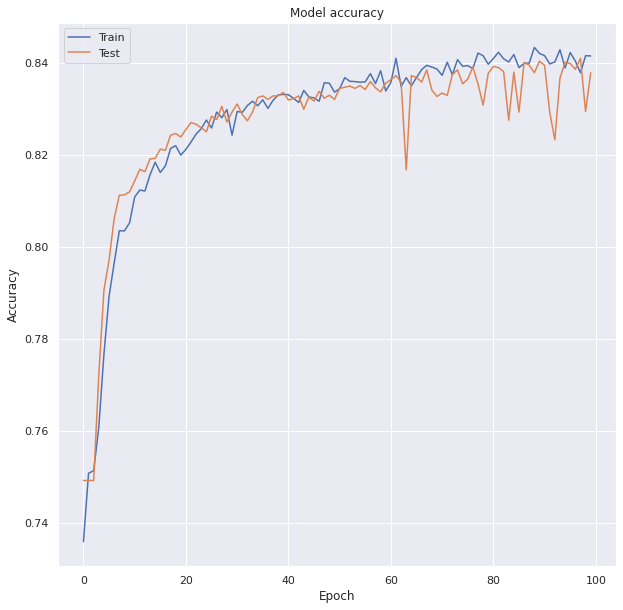

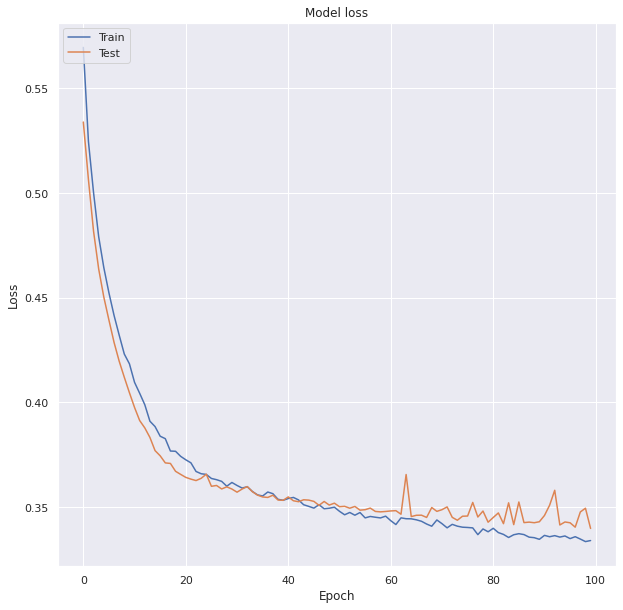

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Dropout of 20% in each layer with weight costraint

In [ ]:
from keras.layers import Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


253/253 [==============================] - 1s 3ms/step - loss: 0.5738 - accuracy: 0.7488 - val_loss: 0.5470 - val_accuracy: 0.7492
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5430 - accuracy: 0.7508 - val_loss: 0.5287 - val_accuracy: 0.7492
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5249 - accuracy: 0.7508 - val_loss: 0.5073 - val_accuracy: 0.7492
Epoch 4/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5070 - accuracy: 0.7509 - val_loss: 0.4870 - val_accuracy: 0.7492
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4912 - accuracy: 0.7522 - val_loss: 0.4721 - val_accuracy: 0.7501
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4769 - accuracy: 0.7615 - val_loss: 0.4605 - val_accuracy: 0.7858
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4696 - accuracy: 0.7742 - val_loss: 0.4509 - val_accuracy: 0.8016
Epoch 8/100

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 3ms/step - loss: 0.3286 - accuracy: 0.8442
The accuracy of the Training data set is  84.4200849533081
249/249 [==============================] - 1s 2ms/step - loss: 0.3443 - accuracy: 0.8393
The accuracy of the Test data set is  83.93261432647705


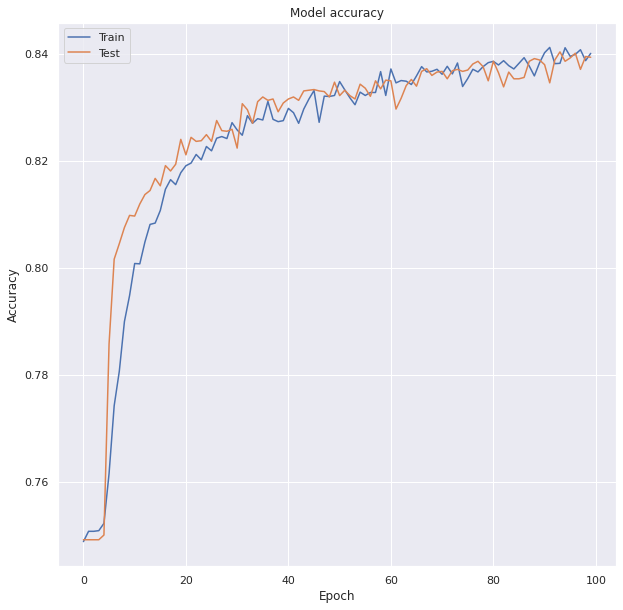

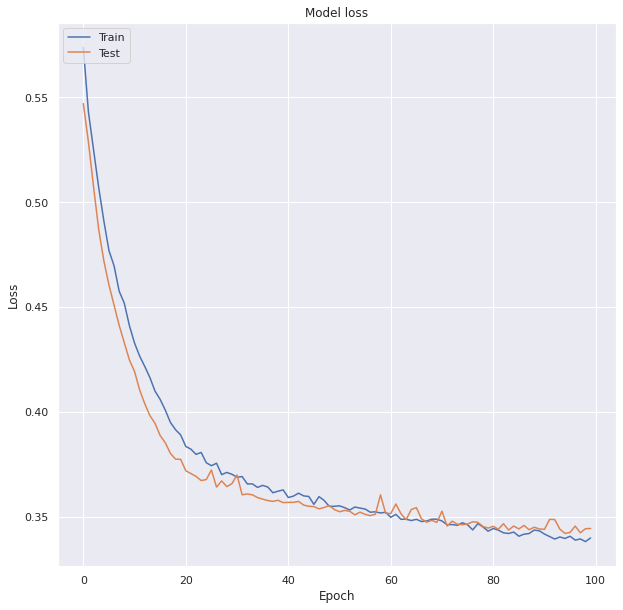

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Dropout of 4% in each layer with weight costraint

In [ ]:
from keras.layers import Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


253/253 [==============================] - 1s 3ms/step - loss: 0.5853 - accuracy: 0.7261 - val_loss: 0.5493 - val_accuracy: 0.7492
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5389 - accuracy: 0.7508 - val_loss: 0.5272 - val_accuracy: 0.7492
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5156 - accuracy: 0.7508 - val_loss: 0.5033 - val_accuracy: 0.7492
Epoch 4/100
253/253 [==============================] - 1s 4ms/step - loss: 0.4917 - accuracy: 0.7518 - val_loss: 0.4784 - val_accuracy: 0.7506
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4703 - accuracy: 0.7687 - val_loss: 0.4599 - val_accuracy: 0.7846
Epoch 6/100
253/253 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7887 - val_loss: 0.4467 - val_accuracy: 0.8004
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4428 - accuracy: 0.7996 - val_loss: 0.4363 - val_accuracy: 0.8058
Epoch 8/100

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3253 - accuracy: 0.8466
The accuracy of the Training data set is  84.66159105300903
249/249 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8382
The accuracy of the Test data set is  83.81946086883545


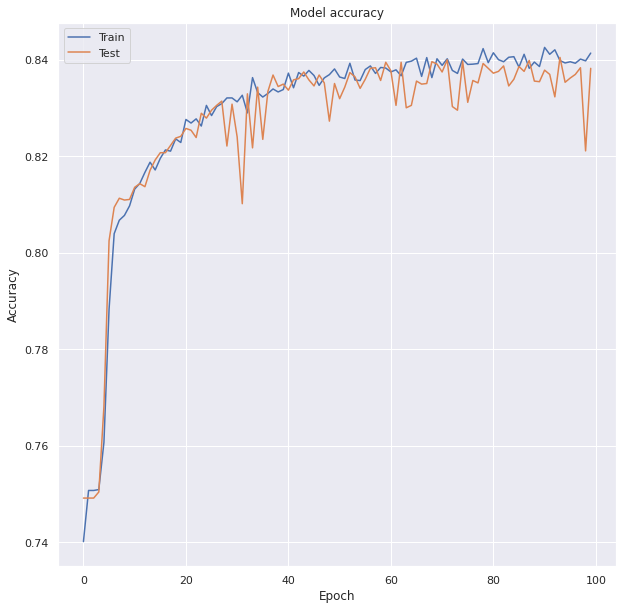

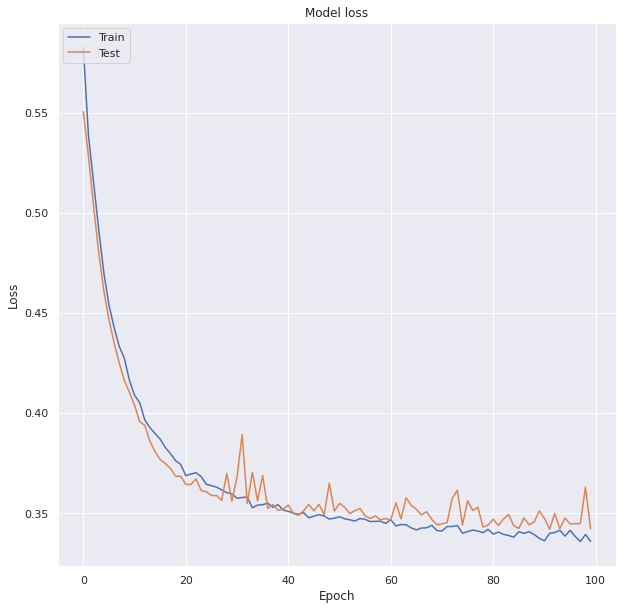

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Dropout of 4% gives the best accuracy

Optimizer - ADAM



In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softmax'))


model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


253/253 [==============================] - 2s 4ms/step - loss: 0.4393 - accuracy: 0.7981 - val_loss: 0.3581 - val_accuracy: 0.8347
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8373 - val_loss: 0.3643 - val_accuracy: 0.8210
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3433 - accuracy: 0.8372 - val_loss: 0.3468 - val_accuracy: 0.8392
Epoch 4/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3390 - accuracy: 0.8422 - val_loss: 0.3475 - val_accuracy: 0.8343
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3385 - accuracy: 0.8395 - val_loss: 0.3433 - val_accuracy: 0.8398
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8415 - val_loss: 0.3498 - val_accuracy: 0.8342
Epoch 7/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8436 - val_loss: 0.3419 - val_accuracy: 0.8402
Epoch 8/100

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.2830 - accuracy: 0.8661
The accuracy of the Training data set is  86.60598397254944
249/249 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8401
The accuracy of the Test data set is  84.00804400444031


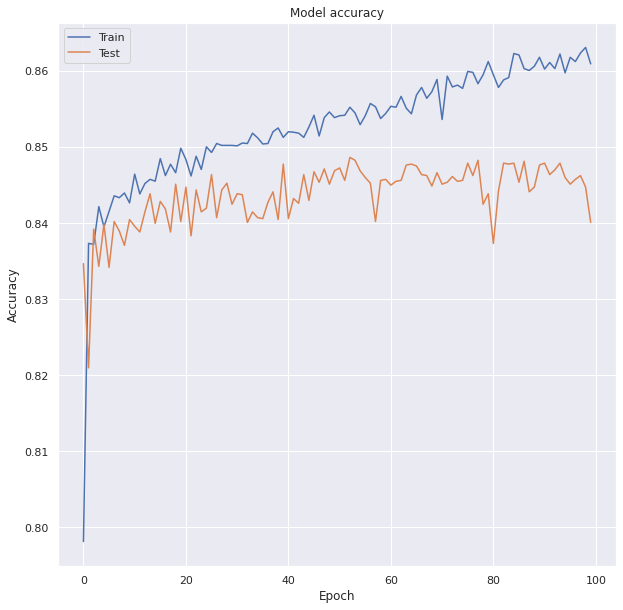

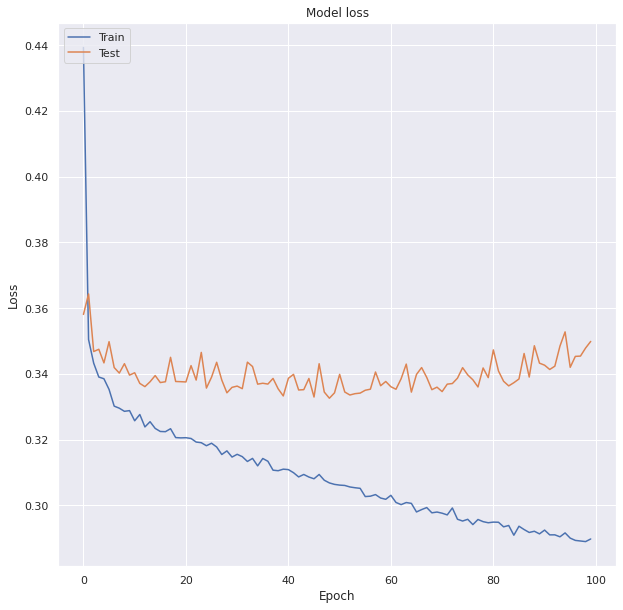

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Optimizer - RMSprop


In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='RMSprop',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


253/253 [==============================] - 2s 5ms/step - loss: 0.4332 - accuracy: 0.7989 - val_loss: 0.3608 - val_accuracy: 0.8367
Epoch 2/100
253/253 [==============================] - 1s 6ms/step - loss: 0.3579 - accuracy: 0.8321 - val_loss: 0.3632 - val_accuracy: 0.8340
Epoch 3/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3468 - accuracy: 0.8391 - val_loss: 0.3694 - val_accuracy: 0.8309
Epoch 4/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3424 - accuracy: 0.8386 - val_loss: 0.3452 - val_accuracy: 0.8379
Epoch 5/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3378 - accuracy: 0.8399 - val_loss: 0.3455 - val_accuracy: 0.8368
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8399 - val_loss: 0.3815 - val_accuracy: 0.8245
Epoch 7/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3359 - accuracy: 0.8426 - val_loss: 0.3452 - val_accuracy: 0.8401
Epoch 8/100

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3098 - accuracy: 0.8547
The accuracy of the Training data set is  85.46659350395203
249/249 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8439
The accuracy of the Test data set is  84.3852162361145


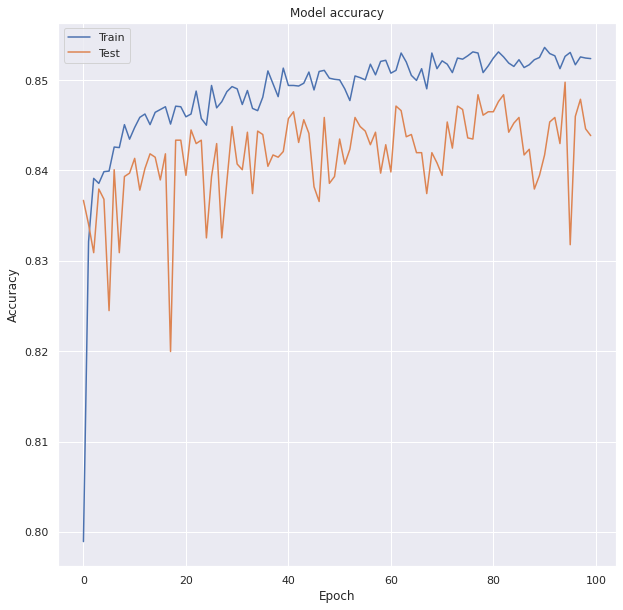

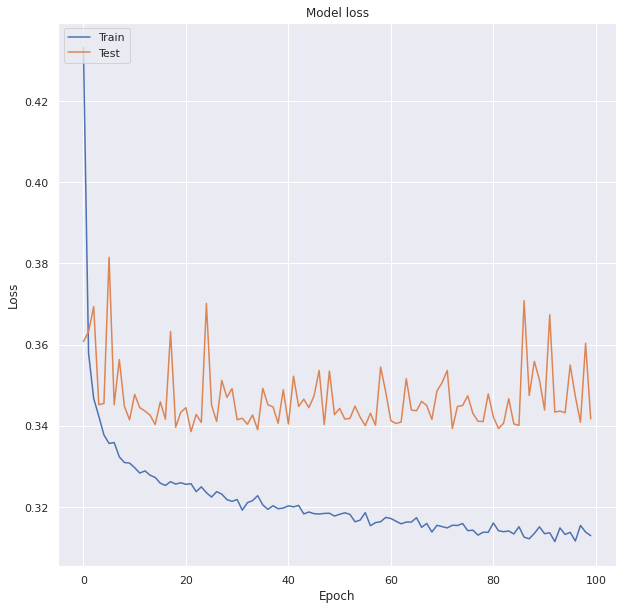

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Optimizer - Adagrad

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softmax'))

model.compile(optimizer='Adagrad',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


253/253 [==============================] - 2s 4ms/step - loss: 0.6277 - accuracy: 0.7341 - val_loss: 0.5867 - val_accuracy: 0.7492
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5732 - accuracy: 0.7508 - val_loss: 0.5615 - val_accuracy: 0.7492
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5570 - accuracy: 0.7508 - val_loss: 0.5498 - val_accuracy: 0.7492
Epoch 4/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5474 - accuracy: 0.7508 - val_loss: 0.5410 - val_accuracy: 0.7492
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5386 - accuracy: 0.7508 - val_loss: 0.5334 - val_accuracy: 0.7492
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5304 - accuracy: 0.7508 - val_loss: 0.5263 - val_accuracy: 0.7492
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.5238 - accuracy: 0.7508 - val_loss: 0.5192 - val_accuracy: 0.7492
Epoch 8/100

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3675 - accuracy: 0.8265
The accuracy of the Training data set is  82.64908194541931
249/249 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8234
The accuracy of the Test data set is  82.33593106269836


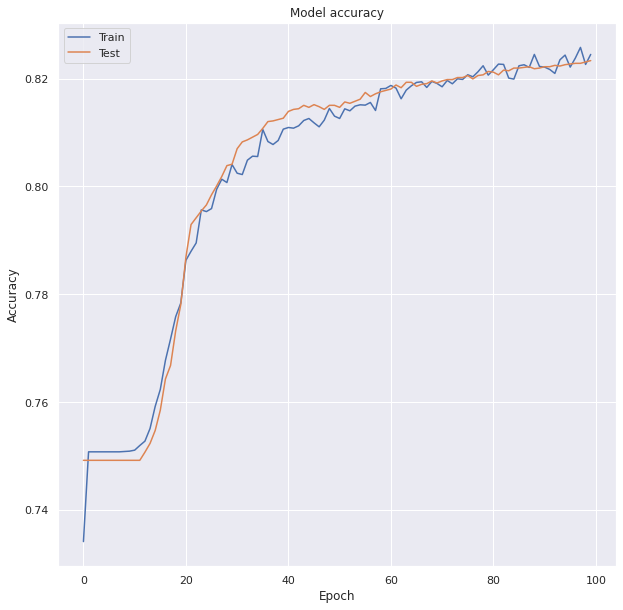

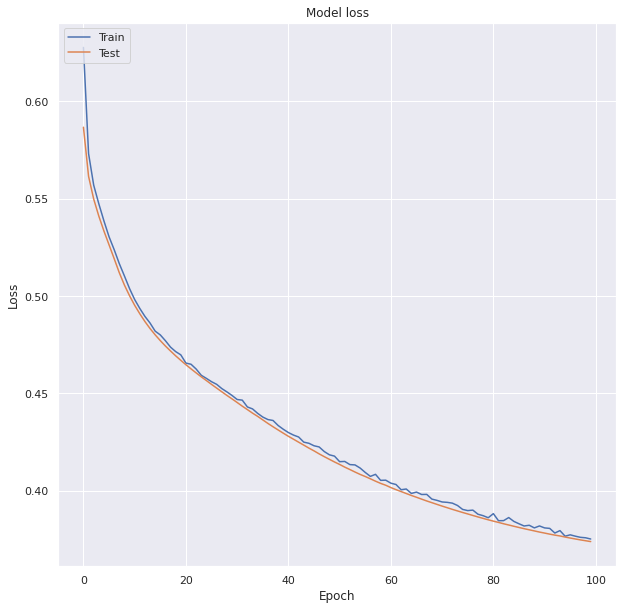

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Optimizer RMSprop gives the best accuracy

Activation function Softmax


In [ ]:
from keras.layers import Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softmax'))

In [ ]:
model.compile(optimizer='RMSprop',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


253/253 [==============================] - 2s 4ms/step - loss: 0.4168 - accuracy: 0.8052 - val_loss: 0.3771 - val_accuracy: 0.8171
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3545 - accuracy: 0.8324 - val_loss: 0.3508 - val_accuracy: 0.8323
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3457 - accuracy: 0.8372 - val_loss: 0.3578 - val_accuracy: 0.8356
Epoch 4/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3423 - accuracy: 0.8368 - val_loss: 0.3664 - val_accuracy: 0.8376
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8397 - val_loss: 0.3505 - val_accuracy: 0.8324
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8413 - val_loss: 0.3523 - val_accuracy: 0.8314
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3337 - accuracy: 0.8418 - val_loss: 0.3413 - val_accuracy: 0.8383
Epoch 8/100

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3208 - accuracy: 0.8501
The accuracy of the Training data set is  85.01455187797546
249/249 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8406
The accuracy of the Test data set is  84.05833840370178


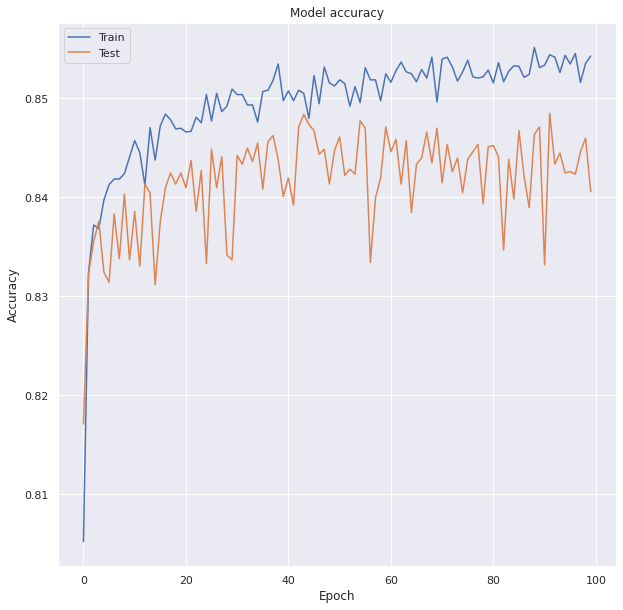

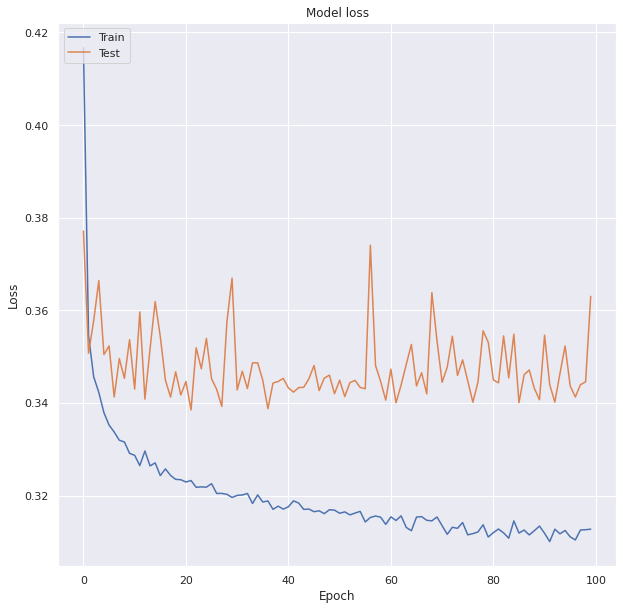

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Activation function Softplus

In [ ]:
from keras.layers import Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softplus'))

In [ ]:
model.compile(optimizer='RMSprop',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100
253/253 [==============================] - 2s 4ms/step - loss: 0.4338 - accuracy: 0.7975 - val_loss: 0.3786 - val_accuracy: 0.8114
Epoch 2/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3589 - accuracy: 0.8322 - val_loss: 0.3495 - val_accuracy: 0.8361
Epoch 3/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3459 - accuracy: 0.8381 - val_loss: 0.3507 - val_accuracy: 0.8369
Epoch 4/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8396 - val_loss: 0.3439 - val_accuracy: 0.8362
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8386 - val_loss: 0.3499 - val_accuracy: 0.8335
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8407 - val_loss: 0.3659 - val_accuracy: 0.8328
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8413 - val_loss: 0.3497 - val_accuracy: 0.8361

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3089 - accuracy: 0.8544
The accuracy of the Training data set is  85.44182181358337
249/249 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8422
The accuracy of the Test data set is  84.2217743396759


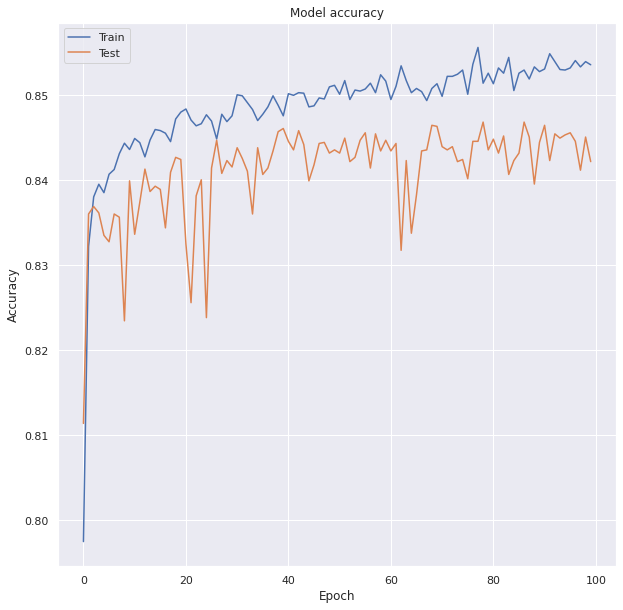

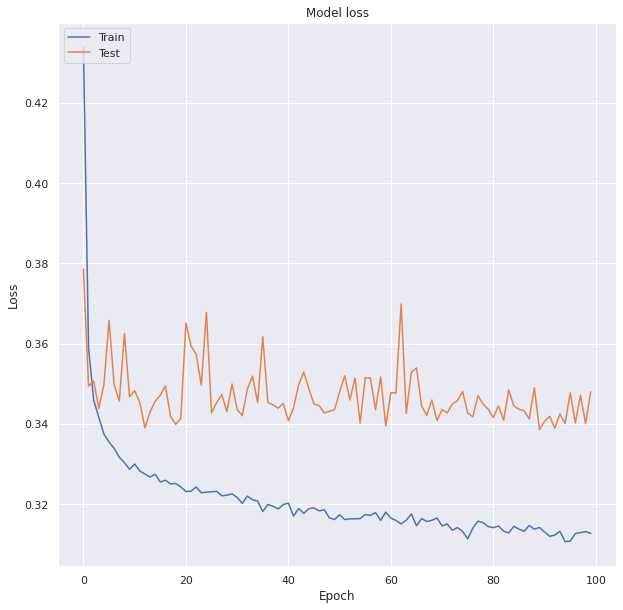

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Activation function Softsign

In [ ]:
from keras.layers import Dropout
from keras.constraints import maxnorm

model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softsign'))

In [ ]:
model.compile(optimizer='RMSprop',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100
253/253 [==============================] - 2s 4ms/step - loss: 0.4690 - accuracy: 0.7941 - val_loss: 0.4307 - val_accuracy: 0.8250
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4242 - accuracy: 0.8206 - val_loss: 0.4327 - val_accuracy: 0.8154
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8256 - val_loss: 0.4127 - val_accuracy: 0.8278
Epoch 4/100
253/253 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8286 - val_loss: 0.4127 - val_accuracy: 0.8307
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8309 - val_loss: 0.4103 - val_accuracy: 0.8294
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4025 - accuracy: 0.8330 - val_loss: 0.4045 - val_accuracy: 0.8313
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8338 - val_loss: 0.4046 - val_accuracy: 0.8318

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3612 - accuracy: 0.8497
The accuracy of the Training data set is  84.96501445770264
249/249 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8395
The accuracy of the Test data set is  83.94518494606018


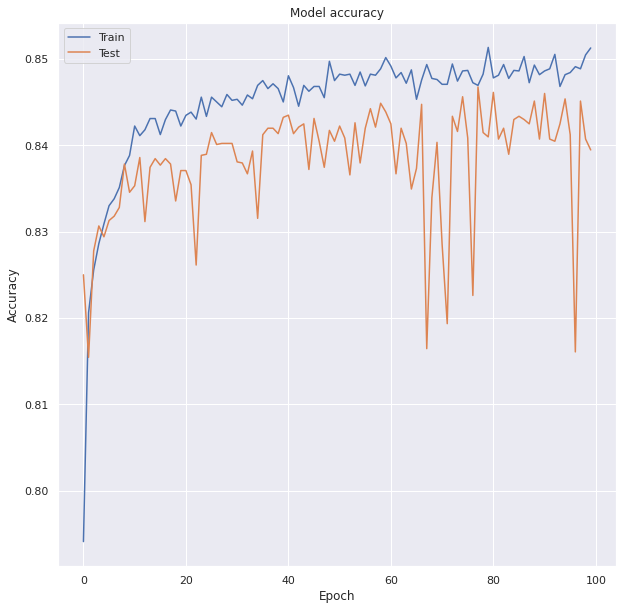

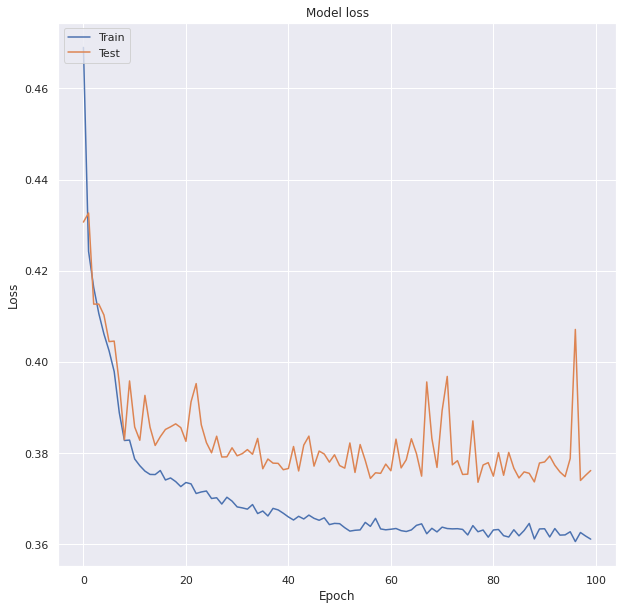

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Activation Function Softplus gave the best accuracy

BASE NN MODEL



In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softplus'))

model.compile(optimizer='RMSprop',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=100, batch_size=64)

Epoch 1/100
253/253 [==============================] - 2s 4ms/step - loss: 0.4308 - accuracy: 0.8023 - val_loss: 0.3723 - val_accuracy: 0.8279
Epoch 2/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3584 - accuracy: 0.8332 - val_loss: 0.4290 - val_accuracy: 0.7809
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3483 - accuracy: 0.8377 - val_loss: 0.3499 - val_accuracy: 0.8339
Epoch 4/100
253/253 [==============================] - 1s 6ms/step - loss: 0.3435 - accuracy: 0.8385 - val_loss: 0.3453 - val_accuracy: 0.8349
Epoch 5/100
253/253 [==============================] - 2s 6ms/step - loss: 0.3401 - accuracy: 0.8379 - val_loss: 0.3500 - val_accuracy: 0.8329
Epoch 6/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3368 - accuracy: 0.8399 - val_loss: 0.3522 - val_accuracy: 0.8384
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8427 - val_loss: 0.3489 - val_accuracy: 0.8389

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3087 - accuracy: 0.8552
The accuracy of the Training data set is  85.51613092422485
249/249 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8431
The accuracy of the Test data set is  84.30978059768677


Accuracy of the NN model after optimization is 84.30 which is > than the accuracy of the initally built NN model which had a accuracy of 82.83

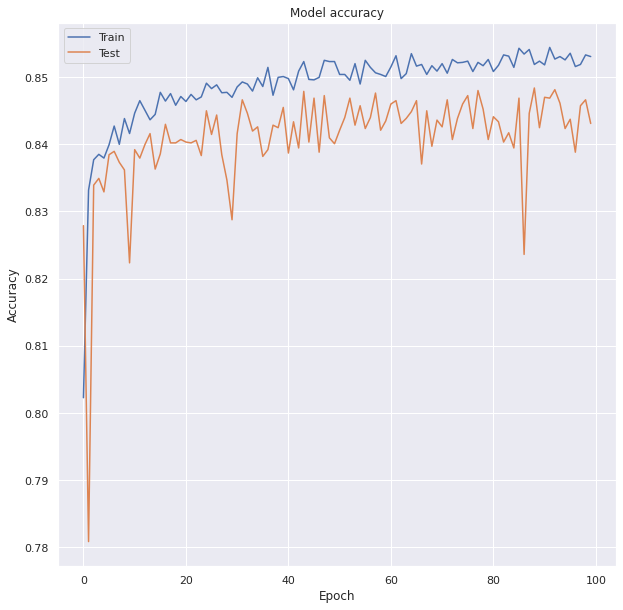

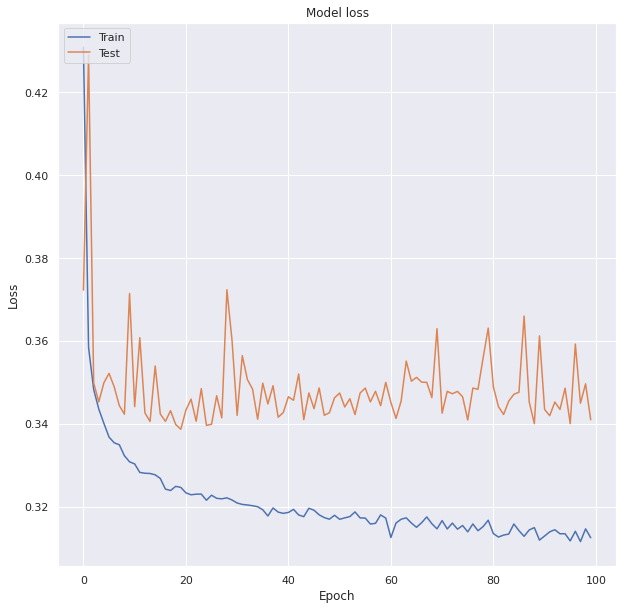

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Improvement Methods

Gradient Clipping

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softplus'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=0.4),loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history1 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),epochs=100, batch_size=64)


Epoch 1/100
253/253 [==============================] - 2s 4ms/step - loss: 0.4264 - accuracy: 0.8037 - val_loss: 0.3647 - val_accuracy: 0.8305
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3616 - accuracy: 0.8302 - val_loss: 0.3583 - val_accuracy: 0.8378
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3495 - accuracy: 0.8340 - val_loss: 0.3484 - val_accuracy: 0.8368
Epoch 4/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3413 - accuracy: 0.8386 - val_loss: 0.3465 - val_accuracy: 0.8387
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8376 - val_loss: 0.3460 - val_accuracy: 0.8363
Epoch 6/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3347 - accuracy: 0.8423 - val_loss: 0.3456 - val_accuracy: 0.8403
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8431 - val_loss: 0.3475 - val_accuracy: 0.8398

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3044 - accuracy: 0.8561
The accuracy of the Training data set is  85.60901880264282
249/249 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8457
The accuracy of the Test data set is  84.57379937171936


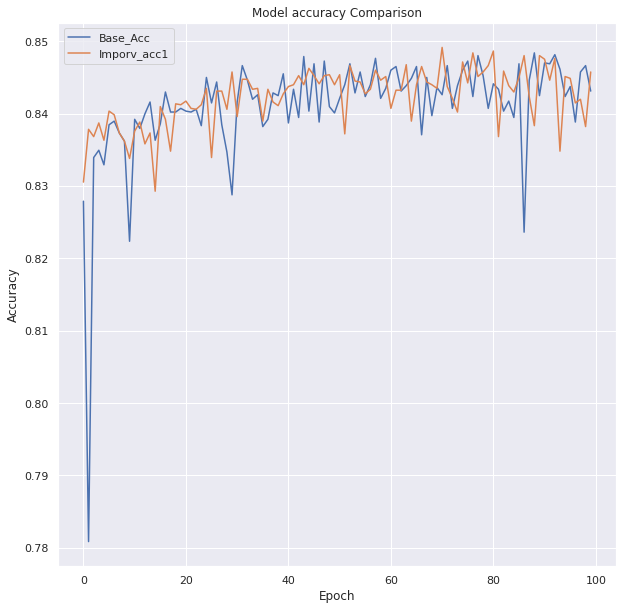

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base_Acc', 'Imporv_acc1'], loc='upper left')
plt.show()


The improved accuracy (84.57) is > than the base model's accuracy (84.30)

Batch Normalization

In [ ]:
from keras.layers import Dense
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softplus'))

model.compile(optimizer='RMSprop',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history2 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),epochs=100, batch_size=64)

Epoch 1/100
253/253 [==============================] - 3s 6ms/step - loss: 0.3883 - accuracy: 0.8138 - val_loss: 0.4573 - val_accuracy: 0.7970
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3525 - accuracy: 0.8326 - val_loss: 0.3626 - val_accuracy: 0.8391
Epoch 3/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.8378 - val_loss: 0.3509 - val_accuracy: 0.8352
Epoch 4/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3411 - accuracy: 0.8376 - val_loss: 0.3447 - val_accuracy: 0.8388
Epoch 5/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8411 - val_loss: 0.3621 - val_accuracy: 0.8384
Epoch 6/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3361 - accuracy: 0.8424 - val_loss: 0.3534 - val_accuracy: 0.8359
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8447 - val_loss: 0.3700 - val_accuracy: 0.8372

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 2ms/step - loss: 0.3039 - accuracy: 0.8552
The accuracy of the Training data set is  85.51613092422485
249/249 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8435
The accuracy of the Test data set is  84.34749841690063


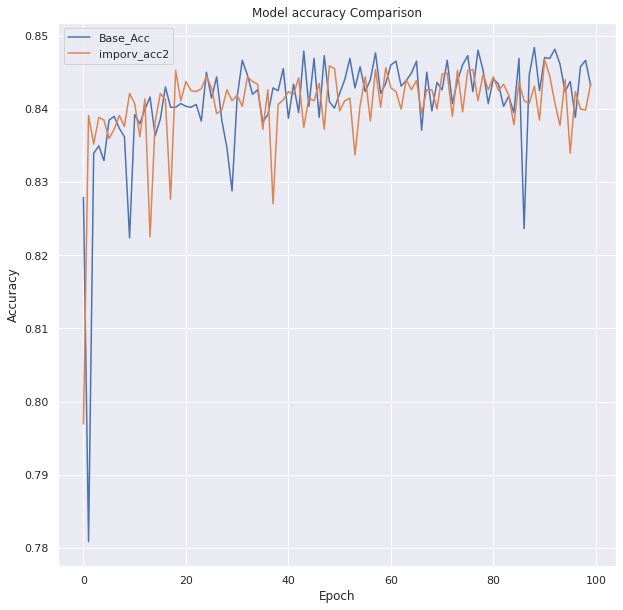

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base_Acc', 'imporv_acc2'], loc='upper left')
plt.show()


The improved accuracy (84.34) is > than the base model's accuracy (84.30)

Kernel Regularization

In [ ]:
model = Sequential()
model.add(Dense(128,kernel_initializer="he_uniform",activation='relu', kernel_regularizer = keras.regularizers.l2(0.0001),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,kernel_initializer="he_uniform",activation='relu', kernel_regularizer = keras.regularizers.l2(0.0001)))
model.add(Dropout(0.04))
model.add(Dense(64,kernel_initializer="he_uniform",activation='relu', kernel_regularizer = keras.regularizers.l2(0.0001)))
model.add(Dropout(0.04))
model.add(Dense(2,kernel_initializer="he_uniform",activation='softplus', kernel_regularizer = keras.regularizers.l2(0.0001)))

model.compile(optimizer='RMSprop',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history3 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),epochs=100, batch_size=64)

Epoch 1/100
253/253 [==============================] - 2s 4ms/step - loss: 0.4755 - accuracy: 0.7966 - val_loss: 0.4180 - val_accuracy: 0.8279
Epoch 2/100
253/253 [==============================] - 1s 3ms/step - loss: 0.4131 - accuracy: 0.8251 - val_loss: 0.4044 - val_accuracy: 0.8274
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8307 - val_loss: 0.3895 - val_accuracy: 0.8362
Epoch 4/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3888 - accuracy: 0.8357 - val_loss: 0.3840 - val_accuracy: 0.8382
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3829 - accuracy: 0.8388 - val_loss: 0.4437 - val_accuracy: 0.8107
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3761 - accuracy: 0.8379 - val_loss: 0.3902 - val_accuracy: 0.8402
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3748 - accuracy: 0.8395 - val_loss: 0.3802 - val_accuracy: 0.8347

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3255 - accuracy: 0.8547
The accuracy of the Training data set is  85.47278642654419
249/249 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8454
The accuracy of the Test data set is  84.5360815525055


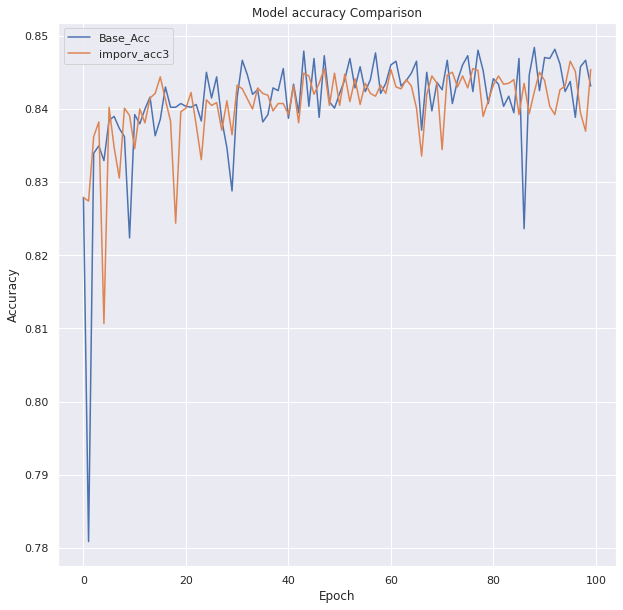

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base_Acc', 'imporv_acc3'], loc='upper left')
plt.show()


The improved accuracy (84.53) is > than the base model's accuracy (84.30)

Early Stopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = Sequential()
model.add(Dense(128,activation='relu', kernel_constraint=maxnorm(3),input_dim=8))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(64,activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.04))
model.add(Dense(2,activation='softplus'))

model.compile(optimizer='RMSprop',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history4 = model.fit(X_train, Y_train,validation_data = (X_test,Y_test),epochs=100, batch_size=64,callbacks=[callback])

Epoch 1/100
253/253 [==============================] - 2s 4ms/step - loss: 0.4338 - accuracy: 0.8005 - val_loss: 0.3711 - val_accuracy: 0.8330
Epoch 2/100
253/253 [==============================] - 1s 4ms/step - loss: 0.3606 - accuracy: 0.8302 - val_loss: 0.3652 - val_accuracy: 0.8271
Epoch 3/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3503 - accuracy: 0.8360 - val_loss: 0.3481 - val_accuracy: 0.8353
Epoch 4/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3461 - accuracy: 0.8372 - val_loss: 0.3856 - val_accuracy: 0.8242
Epoch 5/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3406 - accuracy: 0.8377 - val_loss: 0.3538 - val_accuracy: 0.8301
Epoch 6/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8404 - val_loss: 0.3629 - val_accuracy: 0.8335
Epoch 7/100
253/253 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8409 - val_loss: 0.3558 - val_accuracy: 0.8345

In [ ]:
_, acc = model.evaluate(X_train, Y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(X_test, Y_test)
print('The accuracy of the Test data set is ',acc*100)

505/505 [==============================] - 1s 1ms/step - loss: 0.3127 - accuracy: 0.8532
The accuracy of the Training data set is  85.31797528266907
249/249 [==============================] - 0s 1ms/step - loss: 0.3416 - accuracy: 0.8426
The accuracy of the Test data set is  84.25949215888977


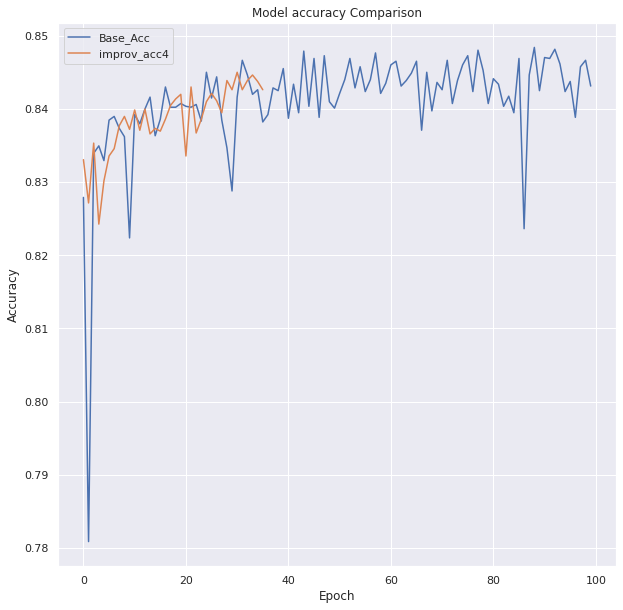

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Base_Acc', 'improv_acc4'], loc='upper left')
plt.show()


The improved accuracy  (84.25) is > than the base model's accuracy (83.82) at epoch no.36